<a href="https://colab.research.google.com/github/AKlebedeff/AKlebedeff2/blob/main/1%D0%91%D0%B8%D0%BD%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Вычислить коэффициенты ω = [ω0, ω1, ω2]T разделяющей линии, которая определяется выражением:  
ω1x1 + ω2x2 + ω0 = 0.
2. Вычислить отступы (margin) для зеленых точек (с меткой класса +1) и синих точек (с меткой класса -1).
Отступ вычисляется по формуле:  
Mi = yi (ω, xi) , i = 1, 2, 3, 4;
где yi ∈ {+1; -1} - метка класса образа (точки);

(ω, xi) = ω1x1 + ω2x2 + ω0  - скалярное произведение векторов.
Вектор  должен быть подобран так, чтобы для наиболее удаленных точек от разделяющей линии отступ был положительным, а для ближних – отрицательным.

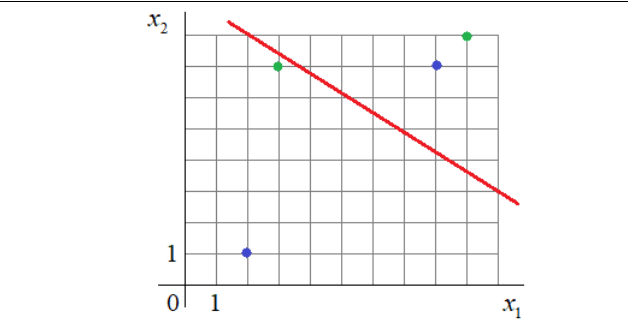

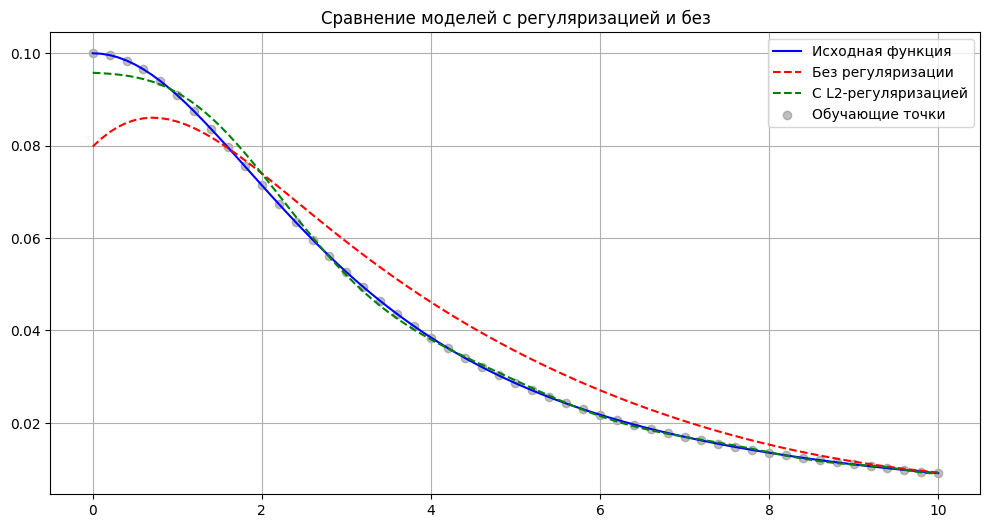

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10.1, 0.1)
# Функция для варианта 6
y = 1 / (10 + x**2)

x_train, y_train = x[::2], y[::2]
N = 13  # степень полинома 13 (14 коэффициентов)
L = 20  # параметр регуляризации

# Матрица признаков
X = np.array([[a ** n for n in range(N)] for a in x])
X_train = X[::2]  # обучающая выборка

# 1. Без регуляризации (пункт 3)
w_no_reg = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# 2. С L2-регуляризацией (пункт 5)
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])
IL[0][0] = 0  # первый коэффициент не регуляризуем
w_reg = np.linalg.inv(X_train.T @ X_train + IL) @ X_train.T @ y_train

# Прогнозы
yy_no_reg = [np.dot(w_no_reg, x_vec) for x_vec in X]
yy_reg = [np.dot(w_reg, x_vec) for x_vec in X]

# Графики
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-', label='Исходная функция')
plt.plot(x, yy_no_reg, 'r--', label='Без регуляризации')
plt.plot(x, yy_reg, 'g--', label='С L2-регуляризацией')
plt.scatter(x_train, y_train, color='gray', alpha=0.5, label='Обучающие точки')
plt.legend()
plt.grid(True)
plt.title('Сравнение моделей с регуляризацией и без')
plt.show()

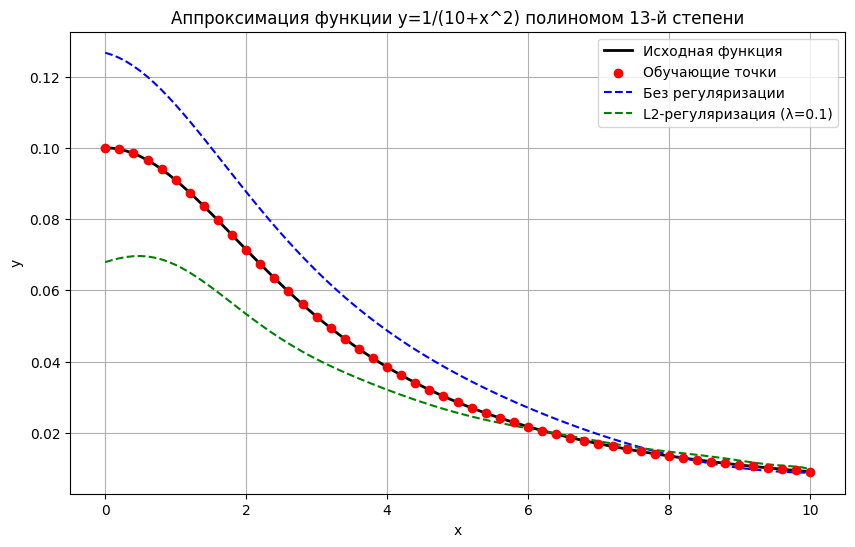

Коэффициенты без регуляризации:
 [ 1.26688005e-01 -5.20383144e-03 -1.03491850e-02 -9.76903429e-04
  2.75025927e-03 -1.08539251e-03  2.25761530e-04 -2.86812821e-05
  2.28883705e-06 -1.17090559e-07  4.93968550e-09 -2.90273671e-10
  1.53920214e-11 -3.52073486e-13]

Коэффициенты с L2-регуляризацией:
 [ 6.79036406e-02  6.28458294e-03 -3.21461132e-03 -5.62500132e-03
  3.36748855e-04  2.56311107e-03 -1.44348534e-03  3.57635675e-04
 -4.21860509e-05  7.20350607e-07  4.38192603e-07 -5.65107002e-08
  2.99178607e-09 -6.11112096e-11]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Исходная функция
def f(x):
    return 1 / (10 + x**2)

# диапазон значений
x = np.arange(0, 10.1, 0.1)
y = f(x)

# 2. Формируем обучающую выборку — только чётные индексы
x_train, y_train = x[::2], y[::2]

# 3. Формируем матрицу признаков для полинома 13-й степени
N = 13
L = 0.1 # коэффициент регуляризации (можно попробовать 0.1, 1, 10 и т.д.)

X = np.array([[a**n for n in range(N + 1)] for a in x])        # все точки
IL = np.array([[L for n in range(N + 1)] for a in x_train])  # обучающие точки

I = np.eye(N + 1)
IL[0, 0] = 0  # не регуляризуем свободный член

X_train = X[::2]
Y = y_train

# 4. Обычная регрессия (без регуляризации)
w_no_reg = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y

# 5. Прогноз модели без регуляризации
y_pred_no_reg = X @ w_no_reg

# 6. L2-регуляризация

w_l2 = np.linalg.inv(X_train.T @ X_train + L * I) @ X_train.T @ Y

# 7. Прогноз модели с регуляризацией
y_pred_l2 = X @ w_l2

# 8. Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Исходная функция', color='black', linewidth=2)
plt.scatter(x_train, y_train, color='red', label='Обучающие точки', zorder=5)
plt.plot(x, y_pred_no_reg, '--', color='blue', label='Без регуляризации')
plt.plot(x, y_pred_l2, '--', color='green', label=f'L2-регуляризация (λ={λ})')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Аппроксимация функции y=1/(10+x^2) полиномом 13-й степени')
plt.show()

# 9. Вывод коэффициентов
print("Коэффициенты без регуляризации:\n", w_no_reg)
print("\nКоэффициенты с L2-регуляризацией:\n", w_l2)
